1.**Kütüphaneleri Ekleme**
 
Bu projede, "Animals with Attributes 2" veri seti kullanılmıştır. Veri seti, farklı hayvan türlerine ait görüntüler içermektedir. Proje kapsamında, bu görüntüler sınıflandırılarak bir derin öğrenme modeli eğitilmiştir.

Kütüphaneler ve Kullanım Amaçları:

os, cv2, numpy: Dosya işlemleri ve görüntü işleme.

tensorflow, keras: Derin öğrenme modeli oluşturma ve eğitim.

sklearn: Veri setini eğitim ve test olarak ayırma.

matplotlib: Görselleştirme ve analiz.

In [2]:
import os
import cv2
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

**2.Etiketlerin Tanımlanması ve Görüntü Dizini Ayarları**

Veri Yükleme ve Ön İşleme

Amaç:

Görselleri yükleyip yeniden boyutlandırarak model eğitimi için hazır hale getirmek.

Veriyi normalleştirerek modelin daha verimli öğrenmesini sağlamak.

Bu kod bloğu, her sınıf için ilk 650 resmi yükler, yeniden boyutlandırır ve normalleştirir. Verilerin doğru şekilde yüklendiği kontrol edilmiştir.

In [3]:
labels_dict = {
    'collie': 0,
    'dolphin': 1,
    'elephant': 2,
    'fox': 3,
    'moose': 4,
    'rabbit': 5,
    'sheep': 6,
    'squirrel': 7,
}

# Görüntü dizini
image_dir = '/kaggle/input/animals-with-attributes-2/Animals_with_Attributes2/JPEGImages/'


**Görüntülerin Yüklenmesi ve İşlenmesi**

In [4]:
# Resimlerin hazırlanacağı liste
images = []
labels = []
image_size = (224, 224)

# Her sınıf için ilk 650 resmi al
for label_name, label_id in labels_dict.items():
    label_dir = os.path.join(image_dir, label_name)
    
    if not os.path.exists(label_dir):
        print(f"{label_name} klasörü bulunamadı.")
        continue
    
    image_files = os.listdir(label_dir)[:650]  # İlk 650 resmi al
    
    for img_file in image_files:
        img_path = os.path.join(label_dir, img_file)
        
        # Dosyanın mevcut olup olmadığını kontrol etme
        if not os.path.isfile(img_path):
            print(f"Resim yüklenemedi: {img_path}")
            continue
        
        img = cv2.imread(img_path)
        if img is not None:
            img_resized = cv2.resize(img, image_size)  # Resmi yeniden boyutlandırma
            img_normalized = img_resized / 255.0  # Normalizasyon
            images.append(img_normalized)
            labels.append(label_id)

# Resimleri numpy array'e çevirme
X = np.array(images)
y = np.array(labels)


**3.Eğitim ve Test Verisinin Ayrılamsı**

Veri Bölme ve Artırma

Amaç:

Veriyi eğitim ve test setlerine ayırmak.

Veri artırma (Data Augmentation) ile modelin genelleme yeteneğini artırmak.

Eğitim verilerinin %70'i model eğitimi için ayrılmıştır.

Veri artırma işlemi, görüntülerin dönüşü, ölçeklenmesi ve kaydırılması ile çeşitlendirilmiştir.

In [5]:
# Eğitim ve test verisini ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Verinin boyutlarını kontrol etme
print(f"X_train şekli: {X_train.shape}")
print(f"X_test şekli: {X_test.shape}")


X_train şekli: (3640, 224, 224, 3)
X_test şekli: (1560, 224, 224, 3)


**Veri Artırma**

In [6]:
# Veri artırma işlemleri
datagen = ImageDataGenerator(
    rotation_range=30,          
    width_shift_range=0.2,      
    height_shift_range=0.2,     
    shear_range=0.2,            
    zoom_range=0.2,             
    horizontal_flip=True,       
    fill_mode='nearest'         
)

# Veri artırmayı eğitim verisine uygulama
datagen.fit(X_train)


**4.Modelin Oluşturulamsı**

Model Oluşturma ve Eğitim

Amaç:

Konvolüsyonel Sinir Ağı (CNN) kullanarak görüntüleri sınıflandırmak.

Modeli optimize edip overfitting'i önlemek için erken durdurma kullanmak.

Bu CNN modeli dört konvolüsyon katmanından oluşur ve 512 nöronlu bir tam bağlantılı katman içerir. Modelde Batch Normalization ve Dropout katmanları kullanılarak aşırı öğrenme riski azaltılmıştır.

In [7]:
# Modeli oluşturma
model = Sequential()

# Konvolüsyonel katmanlar
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(BatchNormalization())  
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())  
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())  
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(BatchNormalization())  
model.add(MaxPooling2D((2, 2)))

# Tam bağlantılı katman
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))  # 10 sınıf


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**5.Modeli Derleme**

In [8]:
# Modeli derleme
optimizer = Adam(learning_rate=0.0005)  

model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])


**6.Erken Durdurma (EarlyStopping)**

In [9]:
# Erken durdurmak callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


**7.Modeli Eğitme**

In [10]:
# Modeli eğitme
model.fit(datagen.flow(X_train, y_train, batch_size=32), 
          epochs=20, 
          validation_data=(X_test, y_test), 
          callbacks=[early_stopping])


Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


114/114 ━━━━━━━━━━━━━━━━━━━━ 486s 4s/step - accuracy: 0.2534 - loss: 7.7144 - val_accuracy: 0.1917 - val_loss: 8.6084
Epoch 2/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 483s 4s/step - accuracy: 0.2931 - loss: 2.2681 - val_accuracy: 0.2494 - val_loss: 2.4685
Epoch 3/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 491s 4s/step - accuracy: 0.3328 - loss: 2.2017 - val_accuracy: 0.2128 - val_loss: 2.7704
Epoch 4/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 481s 4s/step - accuracy: 0.3386 - loss: 1.8577 - val_accuracy: 0.3917 - val_loss: 1.6824
Epoch 5/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 475s 4s/step - accuracy: 0.3553 - loss: 1.8525 - val_accuracy: 0.3872 - val_loss: 2.0625
Epoch 6/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 478s 4s/step - accuracy: 0.3823 - loss: 1.6671 - val_accuracy: 0.4449 - val_loss: 1.6251
Epoch 7/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 477s 4s/step - accuracy: 0.3926 - loss: 1.6326 - val_accuracy: 0.4558 - val_loss: 1.5116
Epoch 8/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 478s 4s/step - accuracy: 0.4033 - loss: 1.5947 - val_accuracy: 0.482

**8.Test Seti ile Modeli Değerlendirme**

In [11]:
# Modeli test seti üzerinde değerlendirme
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Doğruluğu: {test_accuracy * 100:.2f}%")


49/49 - 34s - 696ms/step - accuracy: 0.5654 - loss: 1.2680
Test Doğruluğu: 56.54%


**9.Manipüle Edilmiş Görseller ile Değerlendirme**

Manipüle Edilmiş Görsellerle Test Performansı

Manipülasyonlar (parlaklık artırma ve renk sabitleme) uygulanarak modelin dayanıklılığı test edilmiştir.

Manipüle edilmiş test setleri, modelin daha zorlu koşullara nasıl tepki verdiğini gösterir.

Farklı veri dönüşümleri ile başarı oranları karşılaştırılarak modelin güçlü ve zayıf yönleri analiz edilmiştir.

In [12]:
def get_manipulated_images(X_test):
    manipulated_images = []
    
    # Manipülasyon teknikleri 
    for img in X_test:
        img_bright = cv2.convertScaleAbs(img, alpha=1.3, beta=30)  # Parlaklık artırma
        manipulated_images.append(img_bright)
    
    return np.array(manipulated_images)

X_test_manipulated = get_manipulated_images(X_test)

# Manipüle edilmiş test seti ile model değerlendirme
manipulated_score = model.evaluate(X_test_manipulated, y_test)
print(f"Manipüle edilmiş test seti başarı: {manipulated_score}")


49/49 ━━━━━━━━━━━━━━━━━━━━ 35s 704ms/step - accuracy: 0.1379 - loss: 41.0722
Manipüle edilmiş test seti başarı: [40.6654052734375, 0.14102564752101898]


**10.Renk Sabitleme ve Değerlendirme**

In [13]:
def get_wb_images(X_test):
    wb_images = []
    
    for img in X_test:
        # Alternatif: Normalize işlemi
        result = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
        l, a, b = cv2.split(result)
        l = cv2.equalizeHist(l)
        result = cv2.merge((l, a, b))
        img_gray_world = cv2.cvtColor(result, cv2.COLOR_LAB2BGR)
        wb_images.append(img_gray_world)
    
    return np.array(wb_images)

# Renk sabitlemeli test seti oluşturma
X_test_wb = get_wb_images(X_test_manipulated)

# Renk sabitlemeli test seti ile model değerlendirme
wb_score = model.evaluate(X_test_wb, y_test)
print(f"Renk sabitlemeli test seti başarı: {wb_score}")


49/49 ━━━━━━━━━━━━━━━━━━━━ 34s 700ms/step - accuracy: 0.1403 - loss: 651.3907
Renk sabitlemeli test seti başarı: [655.7432861328125, 0.14423076808452606]


**11.Başarı Karşılaştırması**

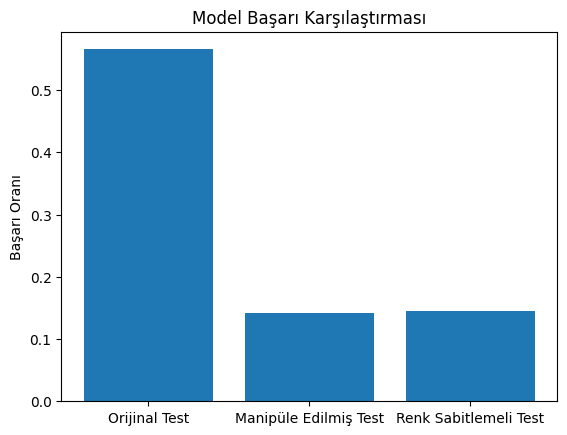

In [14]:
# Başarı oranlarını karşılaştırma
scores = {
    "Orijinal Test": test_accuracy,
    "Manipüle Edilmiş Test": manipulated_score[1],
    "Renk Sabitlemeli Test": wb_score[1]
}

# Başarıları görselleştirme
plt.bar(scores.keys(), scores.values())
plt.ylabel('Başarı Oranı')
plt.title('Model Başarı Karşılaştırması')
plt.show()


**12.Performans Analizi ve Görselleştirme**

Amaç:

Eğitim ve doğrulama performansını analiz ederek overfitting olup olmadığını değerlendirmek.

Epoch 1/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 475s 4s/step - accuracy: 0.4231 - loss: 1.4975 - val_accuracy: 0.3615 - val_loss: 1.7522
Epoch 2/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 471s 4s/step - accuracy: 0.4200 - loss: 1.5533 - val_accuracy: 0.4212 - val_loss: 1.7112
Epoch 3/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 469s 4s/step - accuracy: 0.4462 - loss: 1.4923 - val_accuracy: 0.5013 - val_loss: 1.3620
Epoch 4/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 503s 4s/step - accuracy: 0.4588 - loss: 1.4509 - val_accuracy: 0.4340 - val_loss: 1.6264
Epoch 5/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 469s 4s/step - accuracy: 0.4544 - loss: 1.4654 - val_accuracy: 0.4846 - val_loss: 1.4824


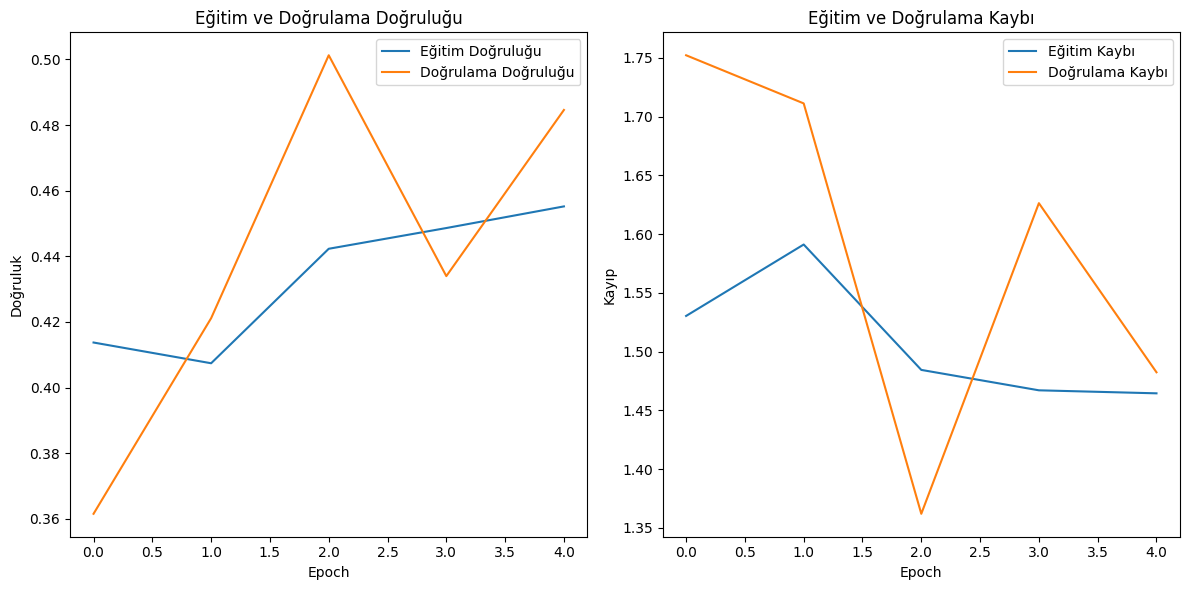

In [15]:
# Eğitim ve doğrulama kayıplarını ve doğruluklarını görselleştirme
history = model.fit(datagen.flow(X_train, y_train, batch_size=32), 
                    epochs=20, 
                    validation_data=(X_test, y_test), 
                    callbacks=[early_stopping])

# Eğitim ve doğrulama doğruluğu grafiği
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()
plt.title('Eğitim ve Doğrulama Doğruluğu')

# Eğitim ve doğrulama kaybı grafiği
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.legend()
plt.title('Eğitim ve Doğrulama Kaybı')

plt.tight_layout()
plt.show()
